# Introduction

So far in this course, we've looked at ANOVAs for parametric test, analyses of variances, and all of these have fallen into the category of linear models, which we'll abbreviate as LM. 

And the ANVOAs that we've used are examples of linear models. 

But there's a generalization of linear models called: Generalized Linear Models. 

How do they generalize the linear model? Conceptually, what you can think of is that the linear model relates our factors or what are called predictor variables, the things we're manipulating in an experiment, it relates them to a response that's generally considered to be normal in nature. 

The generalized linear model goes beyond the relationship of predictors to our response being normal to allow for those other kinds of distributions that we looked at previously. I won't draw them all again but we'll remember the lognormal distribution and we'll remember things like the exponential distribution, the Poisson distribution, gamme distribution, bionomial or multinomial distributions that we talked about previously. 

When we generalize the model to these other distributions, we're able to analyze data that would otherwise perhaps violate the assumptions of ANOVA or not be suitable to just the regular linear model. 

So we're going to use GLMs to revisit some of the data that we analyzed previously in other ways. And we'll show that these generalized linear models are quite powerful and versatile. 

The generalized linear model can only handle between-subjects factors. So we'll be looking at just between-subjects situations for the generalized lienar model. And later in the course, we'll consider the generalized linear mixed model and the linear mixed model, which add the opportunity to do within-subjects analyses of experiments. For now, we'll be working with between-subjects with the generalized linear model. 

And we'll look at 3 examples. 

We'll look at our prefs ABC sex data, where we saw website preference respones from men and women in 3 categories (Website A, B, or C). Originally, we analyzed that with a chi-squared test. We analyzed it with a 2 sample chi-squared test. Next, we'll use something called multinomial logistic regression. And you'll recall the word multinomial is related to the multinomal distribution. It's when we have multiple categories of responses. 

We also will look again at our search, scroll, and voice data. And in particular, the effort ratings on the Likert scales. So we had a 1 to 7 effort score that people gave. 

You might recall that this was about using search, scroll, and voice on a smartphone to find contacts in a contacts manager. Now this was originally a within-subjects rating. We'll recode it to pretend it's a between-subjects variable and comply with the between-subjects requirement for generalized linear models. Previously, we analyzed this with a Friedman test. 

With a between-subjects approach to this, we'll analyze it with something called ordinal logistic regression. Ordinal because we have an ordinal response variable. It's related to multinomial logistic regression but for ordinal responses. And last, we're going to also look in search, scroll, and voice but at the error counts. The errors counts were the errors made while finding contacts in the contacts manager. We originally analyzed that also with a Friedman test. Here, we'll assume again they were between subjects and we'll use Posisson regression to analyze those counts. You might recall we did test early on, knowing this was coming, to see whether those counts were Poisson distributed. 

All of these, Poisson, ordinal, multinomial, are forms of generalized linear models. And we'll see the power of these models to analyze non-numeric responses in these cases, and non-normally distributed data, discrete data distributed in a Poisson model in this case.

# Analyzing 3 Generalized Linear Models (GLM)

Note that what we've done so far in the linear model actually is incorporated in a generalized linear model as well. It would be using the normal distribution as part of the generalized model. Generalized linear models also have, besides their distribution they're considering, something called the link function, and that's how the predictors or the factors relate to the mean of the response. Each distribution in a generalized linear model has a kind of canonical link function that goes with it and we'll always use the canonical one. But you can look into this further and see that you can actually have different link functions along with different distributions. 

In [2]:
# Generalized Linear Models (GLM) extend Linear Models (LM) for studies 
# with between-Ss factors to acommodate nominal (incl. binomial) or ordinal 
# responses, or with non-normal response distributions (e.g., Poisson, 
# exponential, gamma). All GLMs have a distribution and a link fn relating 
# their factors to their response. The GLM generalizes the LM, which is a 
# GLM with a normal distribution and "identity" link fn. See, e.g., 
# http://en.wikipedia.org/wiki/Generalized_linear_model

prefsABCsex.2 <- read.csv("materials/prefsABCsex.csv")
head(prefsABCsex.2)

Subject,Pref,Sex
1,C,F
2,C,M
3,B,M
4,C,M
5,C,M
6,B,F


In [3]:
prefsABCsex.2$Subject <- as.factor(prefsABCsex.2$Subject)

In [4]:
summary(prefsABCsex.2)

    Subject   Pref   Sex   
 1      : 1   A: 8   F:29  
 2      : 1   B:21   M:31  
 3      : 1   C:31         
 4      : 1                
 5      : 1                
 6      : 1                
 (Other):54                

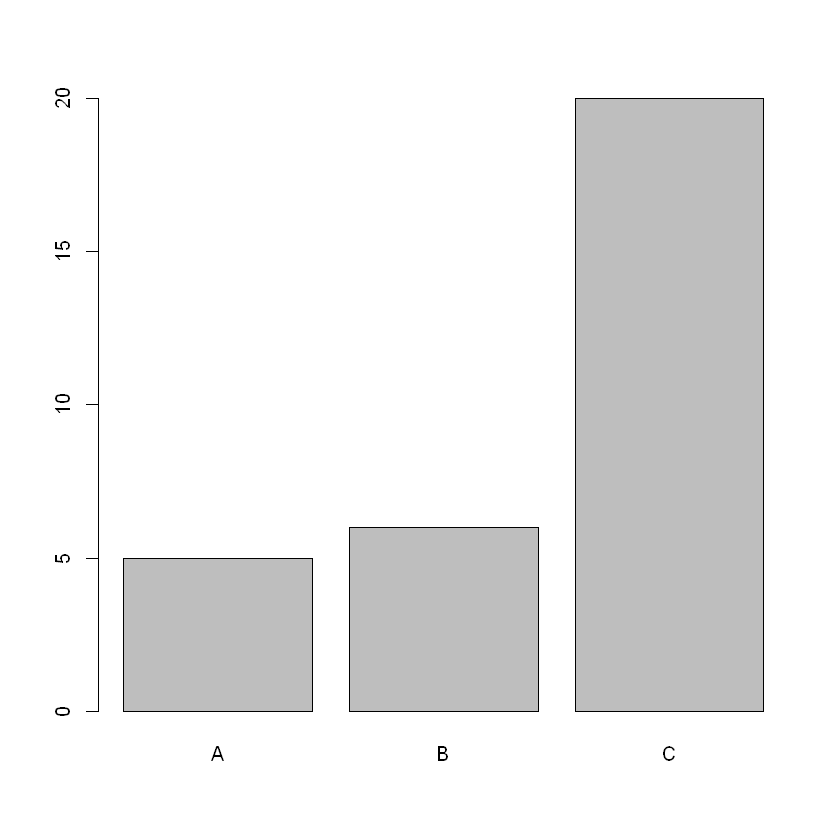

In [7]:
plot(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref)

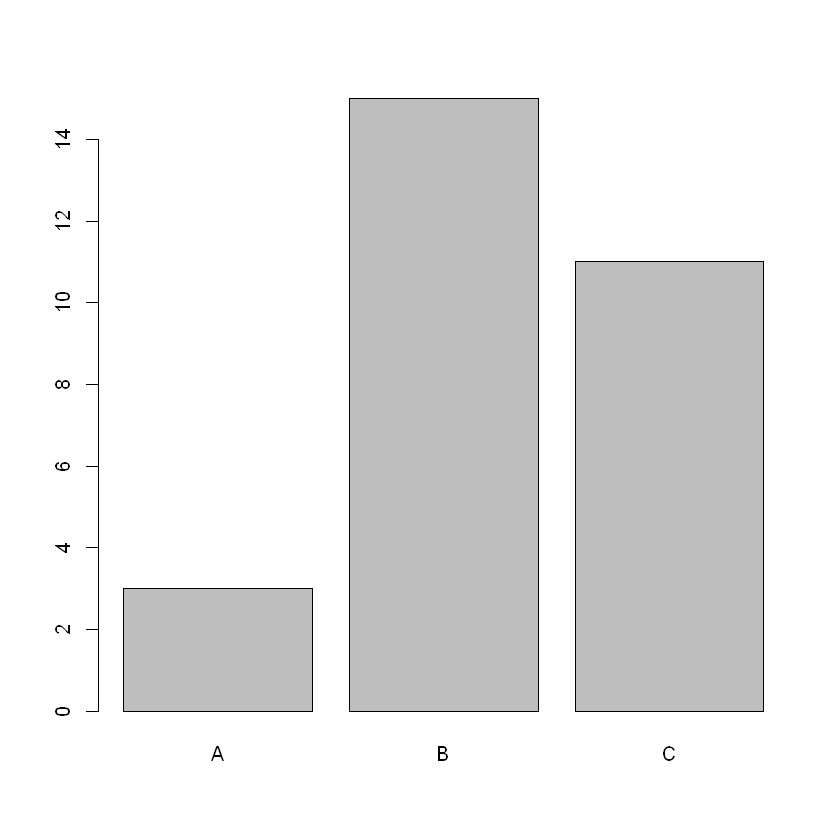

In [15]:
plot(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref)

In [34]:
head(prefsABCsex.2)

Subject,Pref,Sex
1,C,F
2,C,M
3,B,M
4,C,M
5,C,M
6,B,F


In [35]:
## GLM 1: Nominal logistic regression for preference responses
## -----  Multinomial distribution w/ logit link fn

In [14]:
# analyze Pref by Sex with multinomial logistic regression,
# also sometimes called nominal logistic regression

library("nnet") # for multinom
library("car") # for anova

# set sum to zero contrasts for the anova call
contrasts(prefsABCsex.2$Sex) <- "contr.sum"

contrasts(prefsABCsex.2$Sex)

F,1
M,-1


In [24]:
m <- multinom(Pref ~ Sex, data=prefsABCsex.2)
Anova(m, type=3) 

# note: if Pref had only 2 response categories, we might us 
# binomial regression, which uses the same syntax as poisson regression
# but with family=binomial

# weights:  9 (4 variable)
initial  value 65.916737 
iter  10 value 55.099353
iter  10 value 55.099353
final  value 55.099353 
converged


,LR Chisq,Df,Pr(>Chisq)
Sex,7.074429,2,0.02909426


In [28]:
# recall our testing from before to see which preferences by males were
# significantly different from chance (answer: really liked C).

ma <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref == "A"), 
                     nrow(prefsABCsex.2[prefsABCsex.2$Sex == "M",]), 
                     p=1/3)

mb <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref == "B"), 
                     nrow(prefsABCsex.2[prefsABCsex.2$Sex == "M",]), 
                     p=1/3)

mc <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "M",]$Pref == "C"), 
                     nrow(prefsABCsex.2[prefsABCsex.2$Sex == "M",]), 
                     p=1/3)

p.adjust(c(ma$p.value, mb$p.value, mc$p.value), method="holm") # correct for multiple comparisons

[1] 0.109473564 0.126622172 0.001296754

In [33]:
# and for females, their preferences differed significantly from 
# chance for a different choice (answer: really disliked A).

fa <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref == "A"), 
        nrow(prefsABCsex.2[prefsABCsex.2$Sex == "F",]), 
        p=1/3)

fb <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref == "B"), 
        nrow(prefsABCsex.2[prefsABCsex.2$Sex == "F",]), 
        p=1/3)

fc <- binom.test(
        sum(prefsABCsex.2[prefsABCsex.2$Sex == "F",]$Pref == "C"), 
        nrow(prefsABCsex.2[prefsABCsex.2$Sex == "F",]), 
        p=1/3)

p.adjust(c(fa$p.value, fb$p.value, fc$p.value), method="holm") # correct for multiple comparisons

[1] 0.02703274 0.09447821 0.69396951

In [54]:
## GLM 2: Ordinal logistic regression for Likert responses
## -----  Multinomial distribution w/ cumulative logit link fn

# re-read our data showing Effort Likert rating for finding contacts on a smartphone
srchscrlvce.2 <- read.csv("materials/srchscrlvce.csv")

head(srchscrlvce.2)

Subject,Technique,Order,Time,Errors,Effort
1,Search,1,98,4,5
1,Scroll,2,152,0,6
2,Search,2,57,2,2
2,Scroll,1,148,0,3
3,Search,1,86,3,2
3,Scroll,2,160,0,4


In [55]:
# recode as between-Ss study. we're using the data but faking it so every record is a different subject. 
srchscrlvce.2$Subject <- (1:nrow(srchscrlvce.2)) 

srchscrlvce.2$Subject <- as.factor(srchscrlvce.2$Subject)
srchscrlvce.2$Order <- NULL # drop this 

In [56]:
summary(srchscrlvce.2)

    Subject    Technique       Time           Errors         Effort    
 1      : 1   Scroll:20   Min.   : 49.0   Min.   :0.00   Min.   :1.00  
 2      : 1   Search:20   1st Qu.: 86.0   1st Qu.:1.00   1st Qu.:3.00  
 3      : 1   Voice :20   Median : 97.0   Median :2.00   Median :4.00  
 4      : 1               Mean   :106.2   Mean   :2.75   Mean   :4.15  
 5      : 1               3rd Qu.:128.0   3rd Qu.:4.00   3rd Qu.:5.00  
 6      : 1               Max.   :192.0   Max.   :9.00   Max.   :7.00  
 (Other):54                                                            

In [57]:
head(srchscrlvce.2)

Subject,Technique,Time,Errors,Effort
1,Search,98,4,5
2,Scroll,152,0,6
3,Search,57,2,2
4,Scroll,148,0,3
5,Search,86,3,2
6,Scroll,160,0,4


In [58]:
# re-familiarize ourselves with the Effort Likert response

library("plyr")

ddply(srchscrlvce.2, ~ Technique, function(data) summary(data$Effort))

Technique,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
Scroll,1,3.00,4,4.40,6.00,7
Search,1,3.00,4,3.60,4.25,5
Voice,1,3.75,5,4.45,5.25,6


In [59]:
ddply(srchscrlvce.2, ~ Technique, summarise, Effort.mean=mean(Effort), Effort.sd=sd(Effort))

Technique,Effort.mean,Effort.sd
Scroll,4.40,1.698296
Search,3.60,1.187656
Voice,4.45,1.356272


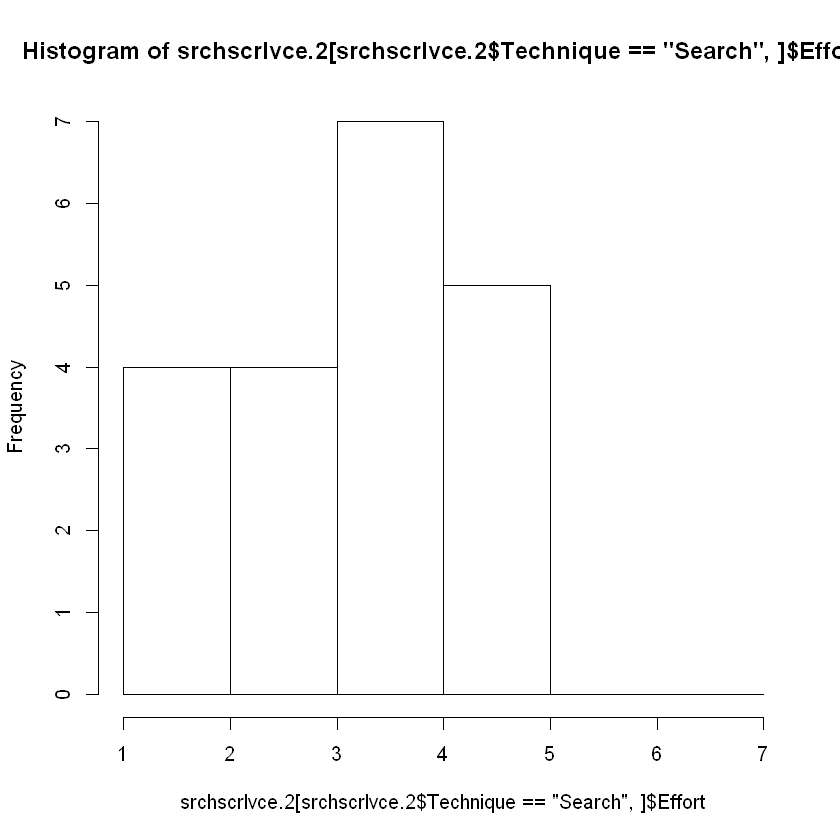

In [60]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Search",]$Effort, breaks=c(1:7), xlim=c(1,7))

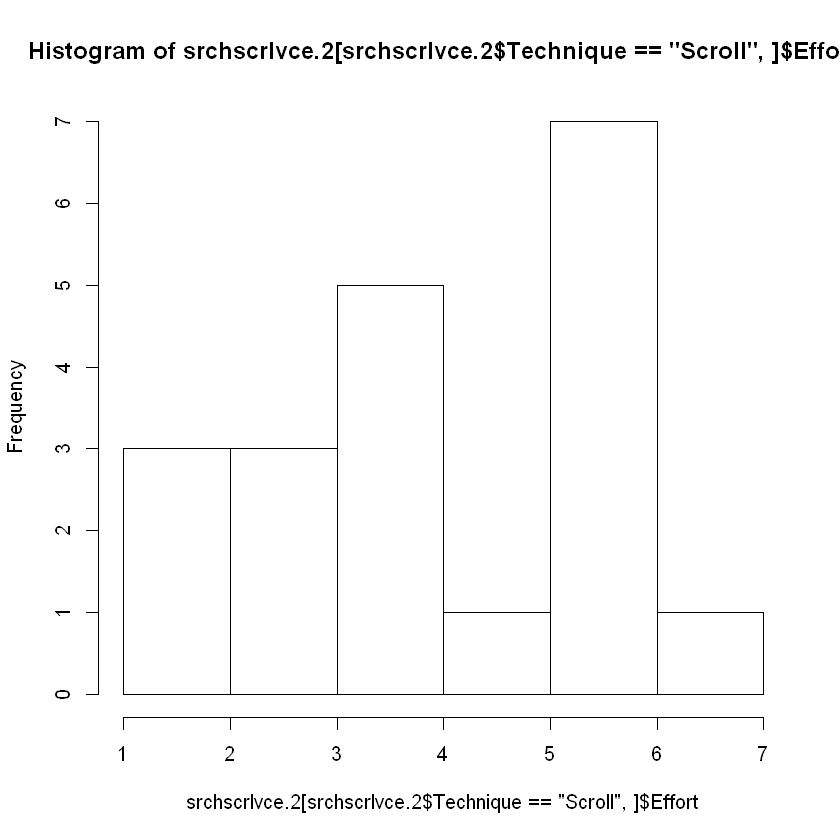

In [61]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Scroll",]$Effort, breaks=c(1:7), xlim=c(1,7))

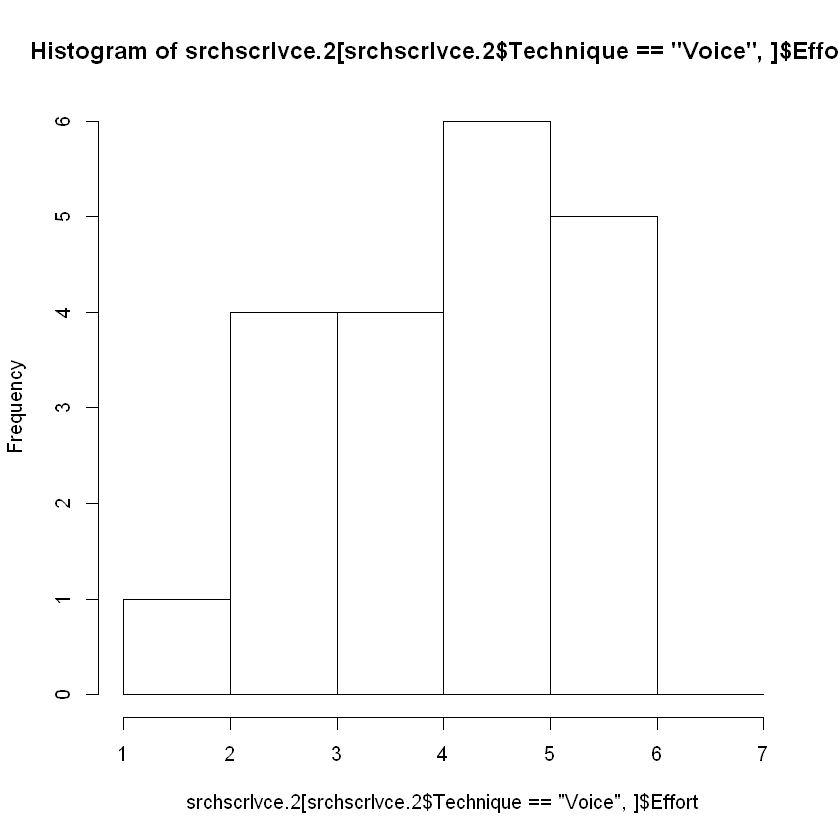

In [62]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Voice",]$Effort, breaks=c(1:7), xlim=c(1,7))

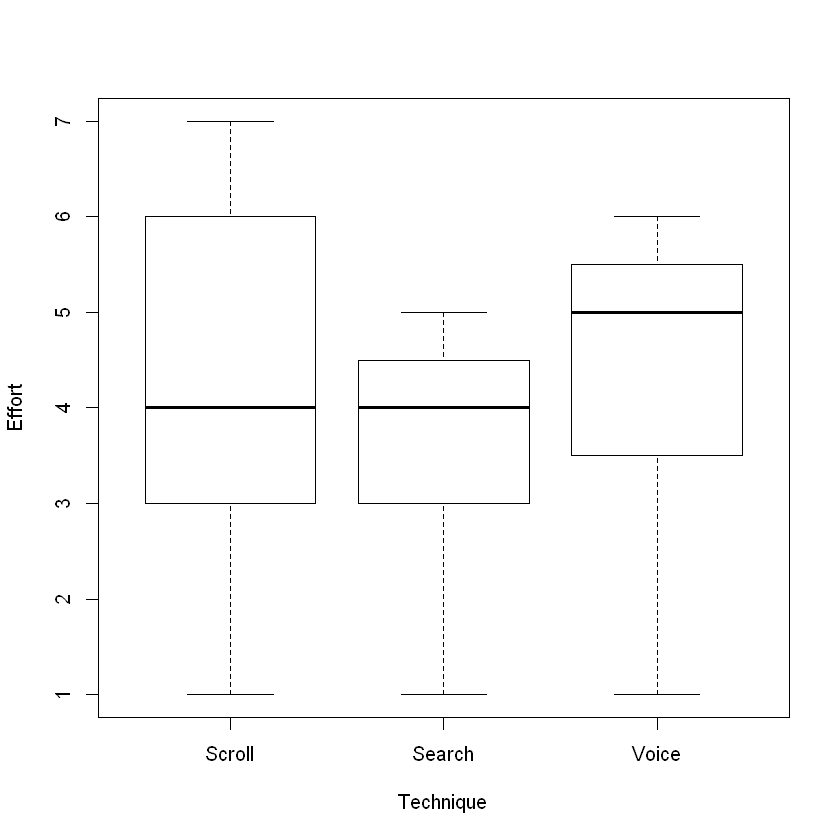

In [63]:
plot(Effort ~ Technique, data=srchscrlvce.2) # boxplot

In [64]:
# analyze Effort Likert ratings by Technique with ordinal logistic regression

library("MASS") # for polr
library("car") # for anova

srchscrlvce.2$Effort <- ordered(srchscrlvce.2$Effort) # must be an ordinal response

In [65]:
summary(srchscrlvce.2)

    Subject    Technique       Time           Errors     Effort
 1      : 1   Scroll:20   Min.   : 49.0   Min.   :0.00   1: 3  
 2      : 1   Search:20   1st Qu.: 86.0   1st Qu.:1.00   2: 5  
 3      : 1   Voice :20   Median : 97.0   Median :2.00   3:11  
 4      : 1               Mean   :106.2   Mean   :2.75   4:16  
 5      : 1               3rd Qu.:128.0   3rd Qu.:4.00   5:12  
 6      : 1               Max.   :192.0   Max.   :9.00   6:12  
 (Other):54                                              7: 1  

In [67]:
contrasts(srchscrlvce.2$Technique)

,Search,Voice
Scroll,0,0
Search,1,0
Voice,0,1


In [72]:
# set sum-to-zero contrasts for the Anova call
contrasts(srchscrlvce.2$Technique) <- "contr.sum"

contrasts(srchscrlvce.2$Technique)

Scroll,1,0
Search,0,1
Voice,-1,-1


In [73]:
head(srchscrlvce.2)

Subject,Technique,Time,Errors,Effort
1,Search,98,4,5
2,Scroll,152,0,6
3,Search,57,2,2
4,Scroll,148,0,3
5,Search,86,3,2
6,Scroll,160,0,4


In [71]:
m <- polr(Effort ~ Technique, data=srchscrlvce.2, Hess=TRUE) # ordinal logistic
Anova(m, type=3) # n.s.

,LR Chisq,Df,Pr(>Chisq)
Technique,4.524566,2,0.1041125


In [80]:
# post hoc pairwise comparisons are NOT justified due to lack of sig.
# but here's how we would do them, just for completeness

library("multcomp")

summary(glht(m, mcp(Technique="Tukey")), test=adjusted(type="holm")) # Tukey means compare all pairs


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: polr(formula = Effort ~ Technique, data = srchscrlvce.2, Hess = TRUE)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)
Search - Scroll == 0 -1.016610   0.584614  -1.739    0.191
Voice - Scroll == 0   0.007397   0.587700   0.013    0.990
Voice - Search == 0   1.024007   0.552298   1.854    0.191
(Adjusted p values reported -- holm method)


In [82]:
library("lsmeans") # equivalent way using lsmeans, pairs, and as.glht

summary(as.glht((lsmeans(m, pairwise ~ Technique))), test=adjusted(type="holm"))


	 Simultaneous Tests for General Linear Hypotheses

Linear Hypotheses:
            Estimate Std. Error z value Pr(>|z|)
Scroll == 0   0.3556     0.4706   0.756    0.811
Search == 0  -0.6611     0.4203  -1.573    0.347
Voice == 0    0.3630     0.4363   0.832    0.811
(Adjusted p values reported -- holm method)


In [84]:
## GLM 3: Poisson regression for count responses
## -----  Poisson distribution w/ log link fn

# our data also has an "Errors" response, count data
# re-familiarize ourselves with the Errors response
library("plyr")

ddply(srchscrlvce.2, ~ Technique, function(data) summary(data$Errors))

Technique,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
Scroll,0,0.00,0.5,0.70,1.00,2
Search,1,2.00,2.5,2.50,3.00,4
Voice,2,3.75,5.0,5.05,6.25,9


In [85]:
ddply(srchscrlvce.2, ~ Technique, summarise, Errors.mean=mean(Errors), Errors.sd=sd(Errors))

Technique,Errors.mean,Errors.sd
Scroll,0.70,0.8013147
Search,2.50,1.0513150
Voice,5.05,1.9049796


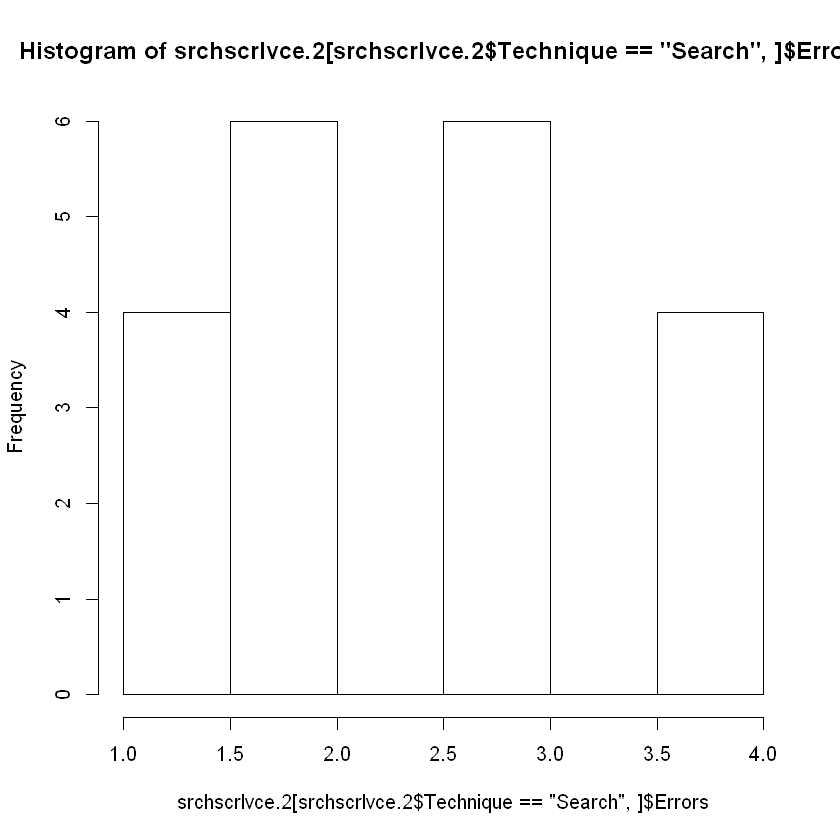

In [86]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Search",]$Errors)

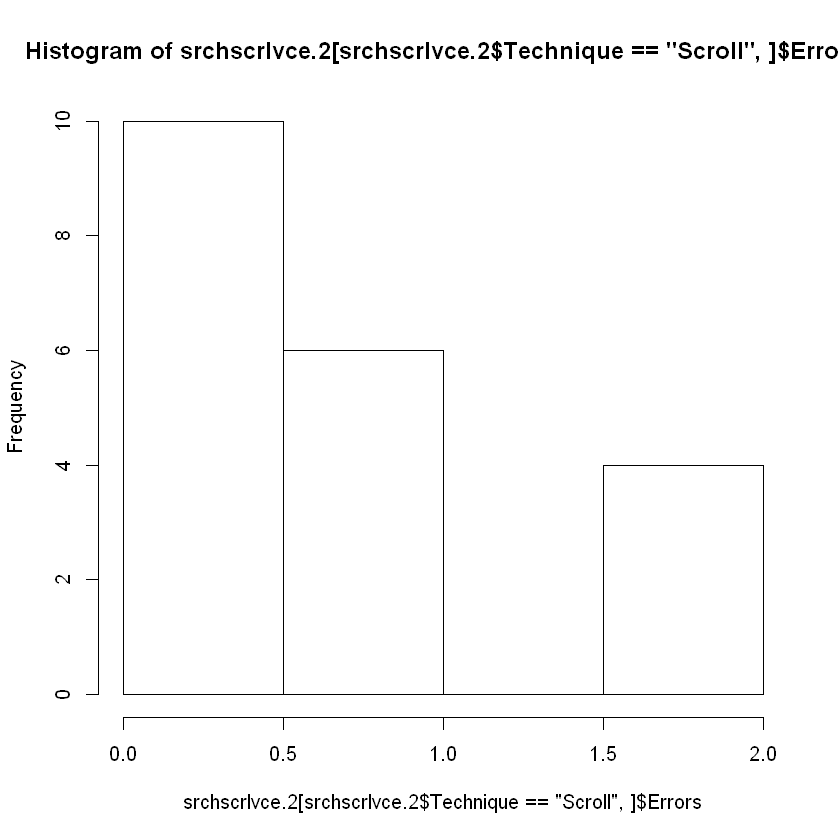

In [87]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Scroll",]$Errors)

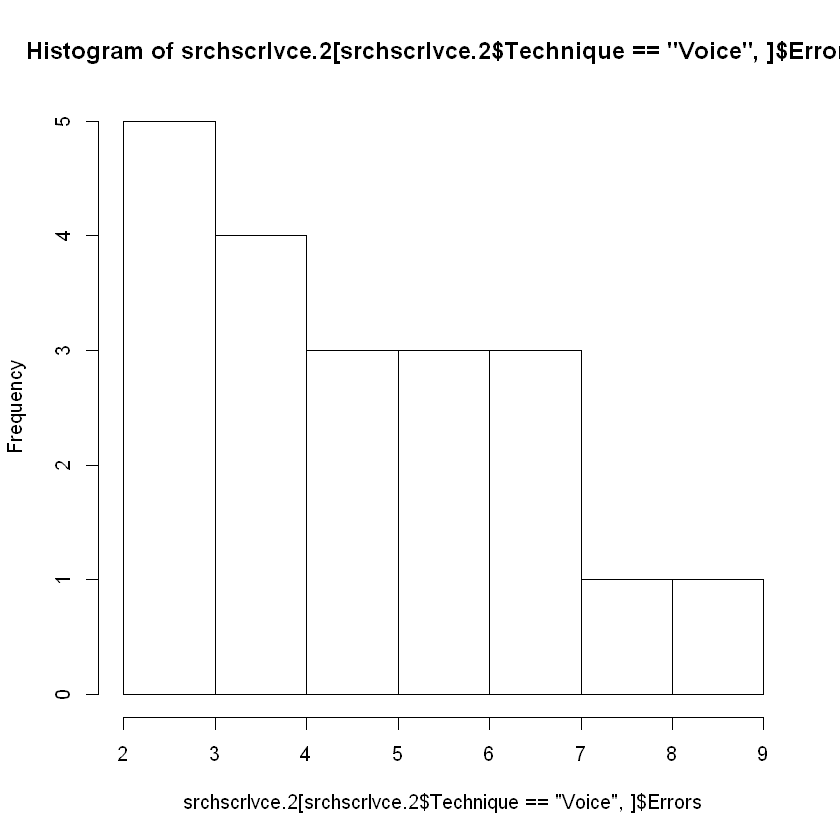

In [88]:
hist(srchscrlvce.2[srchscrlvce.2$Technique == "Voice",]$Errors)

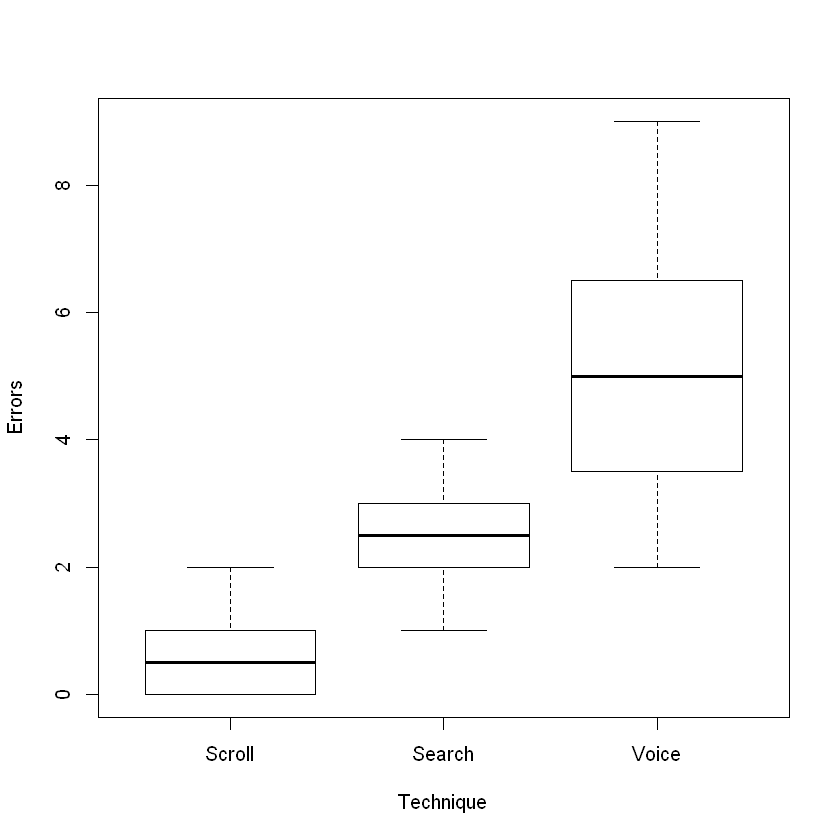

In [89]:
plot(Errors ~ Technique, data=srchscrlvce.2) # boxplot

In [92]:
# re-verify that these data are Poisson-distributed

library("fitdistrplus")

fit <- fitdist(srchscrlvce.2[srchscrlvce.2$Technique == "Search",]$Errors, "pois", discrete=TRUE)
gofstat(fit) # goodness-of-fit test

Chi-squared statistic:  1.522231 
Degree of freedom of the Chi-squared distribution:  2 
Chi-squared p-value:  0.4671449 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 1  4.000000   5.745950
<= 2  6.000000   5.130312
<= 3  6.000000   4.275260
> 3   4.000000   4.848478

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   65.61424
Bayesian Information Criterion   66.60997

In [94]:
fit <- fitdist(srchscrlvce.2[srchscrlvce.2$Technique == "Scroll",]$Errors, "pois", discrete=TRUE)
gofstat(fit) # goodness-of-fit test

Chi-squared statistic:  0.3816087 
Degree of freedom of the Chi-squared distribution:  1 
Chi-squared p-value:  0.5367435 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 0 10.000000   9.931706
<= 1  6.000000   6.952194
> 1   4.000000   3.116100

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   45.53208
Bayesian Information Criterion   46.52781

In [96]:
fit <- fitdist(srchscrlvce.2[srchscrlvce.2$Technique == "Voice",]$Errors, "pois", discrete=TRUE)
gofstat(fit) # goodness-of-fit test

Chi-squared statistic:  0.1611327 
Degree of freedom of the Chi-squared distribution:  3 
Chi-squared p-value:  0.9836055 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
     obscounts theocounts
<= 3  5.000000   5.161546
<= 4  4.000000   3.473739
<= 5  3.000000   3.508476
<= 6  3.000000   2.952967
> 6   5.000000   4.903272

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   84.19266
Bayesian Information Criterion   85.18839

In [97]:
contrasts(srchscrlvce.2$Technique)

Scroll,1,0
Search,0,1
Voice,-1,-1


In [99]:
# analyze using Poisson regression
# set sum-to-zero contrasts for the Anova call
contrasts(srchscrlvce.2$Technique) <- "contr.sum"

contrasts(srchscrlvce.2$Technique)

Scroll,1,0
Search,0,1
Voice,-1,-1


In [100]:
# family parameter identifies both distribution and link fn
m <- glm(Errors ~ Technique, data=srchscrlvce.2, family=poisson)
Anova(m, type=3)

,LR Chisq,Df,Pr(>Chisq)
Technique,74.9303,2,5.359105e-17


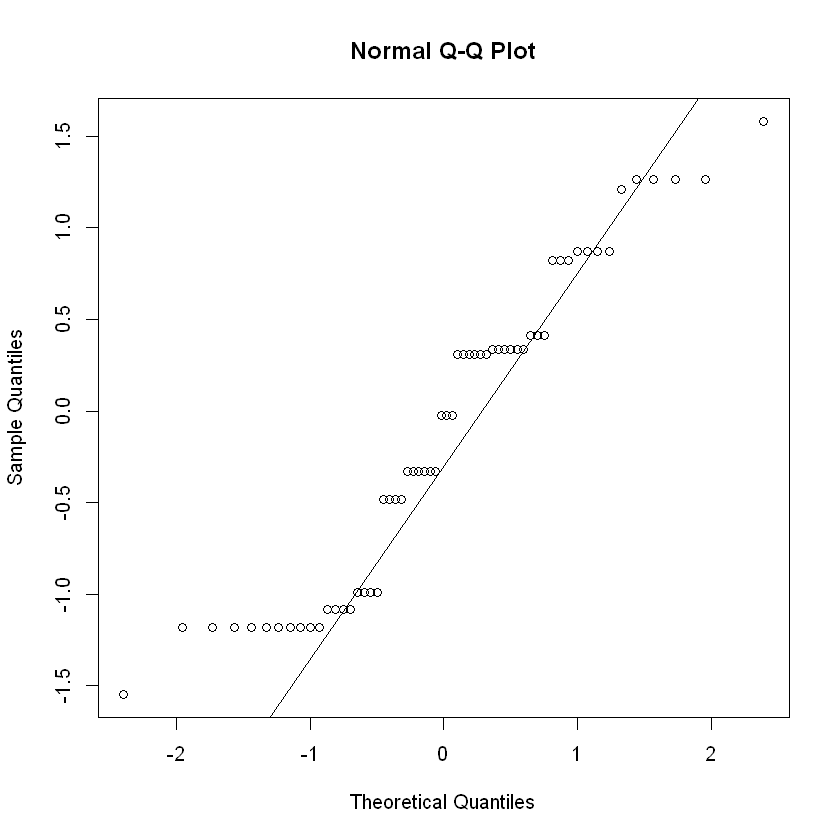

In [103]:
qqnorm(residuals(m)); qqline(residuals(m)) # it's ok! Poisson regression makes no normality assumption

In [105]:
# conduct pairwise comparisons among levels of Technique
library("multcomp")

summary(glht(m, mcp(Technique="Tukey")), test=adjusted(type="holm")) # Tukey means compare all pairs


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glm(formula = Errors ~ Technique, family = poisson, data = srchscrlvce.2)

Linear Hypotheses:
                     Estimate Std. Error z value Pr(>|z|)    
Search - Scroll == 0   1.2730     0.3024   4.210 5.11e-05 ***
Voice - Scroll == 0    1.9761     0.2852   6.929 1.27e-11 ***
Voice - Search == 0    0.7031     0.1729   4.066 5.11e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- holm method)
